<a href="https://colab.research.google.com/github/AnkitAKS02/Dog-Vs-Cat-classification-using-CNN/blob/main/DogVSCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{\r\n  "username": "aksonfire",\r\n  "key": "KGAT_f1caf42fe60adf5eda3ef0073b9cee38"\r\n}\r\n'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets list | head


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
neurocipher/heartdisease                                         Heart Disease                                             3491  2025-12-11 15:29:14.327000           2114        261  1.0              
suvidyasonawane/student-academic-placement-performance-dataset   Student Academic Placement Performance Dataset           94469  2026-01-11 02:02:47.837000              0         23  1.0              
kundanbedmutha/exam-score-prediction-dataset                     Exam Score Prediction Dataset                           325454  2025-11-28 07:29:01.047000           5863        292  1.0          

In [4]:
!pip install -q kaggle kagglehub


In [5]:
import kagglehub

path = kagglehub.dataset_download("salader/dogsvscats")
print("Dataset downloaded to:", path)


100%|██████████| 1.06G/1.06G [00:49<00:00, 23.1MB/s]

Extracting files...


Dataset downloaded to: /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import os

path = "/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1"
print(os.listdir(path))



['test', 'catsvsdogs', 'train']


In [9]:
!mkdir -p /content/dataset
!cp -r /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/* /content/dataset/


In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization

In [11]:
#generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [26]:
#Add Data Augmentation
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


In [27]:
#Add L2 Regularization
from tensorflow.keras.regularizers import l2

Conv2D(32, (3,3), activation='relu',
       kernel_regularizer=l2(0.001))


<Conv2D name=conv2d_3, built=False>

In [12]:
#normalize the data
def procss(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(procss)
validation_ds = validation_ds.map(procss)

In [28]:
#This is the second model that i created with the help of nlps and internet
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.regularizers import l2

data_augmentation = Sequential([
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])

model = Sequential([
    data_augmentation,   # OK even after dataset normalization

    Conv2D(
        32, (3,3),
        activation='relu',
        kernel_regularizer=l2(0.001),
        input_shape=(128,128,3)
    ),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(
        64, (3,3),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ),
    BatchNormalization(),
    MaxPooling2D(),

    Conv2D(
        128, (3,3),
        activation='relu',
        kernel_regularizer=l2(0.001)
    ),
    BatchNormalization(),
    MaxPooling2D(),

    GlobalAveragePooling2D(),

    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#CREATING A CNN MODEL:
#This is the first model that i created randomly but it was giving
#overfitting as the data is very huge
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [32]:
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=30,
    callbacks=[EarlyStopping(patience=5, restore_best_weights=True)]
)

Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 104s 153ms/step - accuracy: 0.5953 - loss: 0.8816 - val_accuracy: 0.5692 - val_loss: 0.8697
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.6474 - loss: 0.7242 - val_accuracy: 0.6662 - val_loss: 0.6813
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 154ms/step - accuracy: 0.6762 - loss: 0.6650 - val_accuracy: 0.5296 - val_loss: 0.9047
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 96s 153ms/step - accuracy: 0.7006 - loss: 0.6183 - val_accuracy: 0.5224 - val_loss: 1.1598
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 145s 159ms/step - accuracy: 0.7116 - loss: 0.5996 - val_accuracy: 0.6688 - val_loss: 0.6749
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 157ms/step - accuracy: 0.7322 - loss: 0.5692 - val_accuracy: 0.7634 - val_loss: 0.5469
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 98s 156ms/step - accuracy: 0.7592 - loss: 0.5468 - val_accuracy: 0.7262 - val_loss: 0.6685
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 101s 162ms/step - accuracy: 0.7820 - loss

In [19]:
!pip install matplotlib

FIRST TRAINING OF MODEL

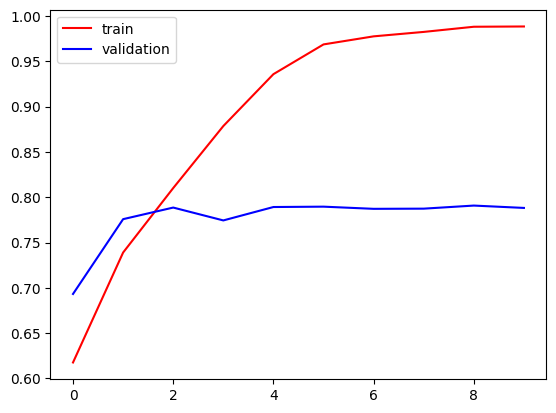

In [22]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

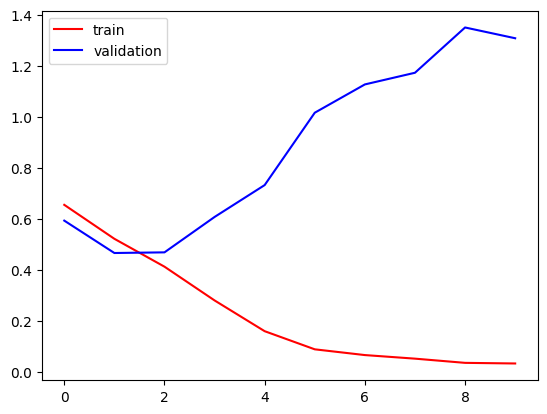

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

SECOND MODEFIED MODEL

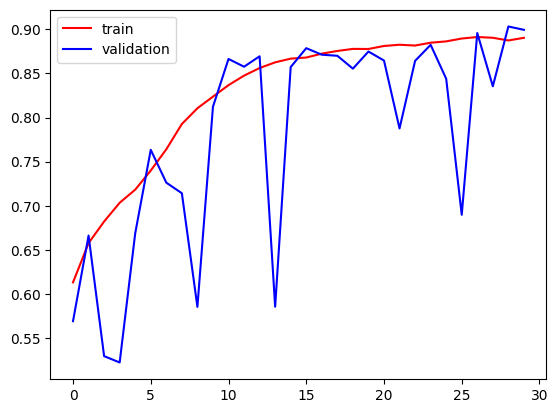

In [33]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

Conclusion == Training accuracy:
Smooth increase → ~0.89

Validation accuracy:
Noisy but tracks training accuracy closely, ends around 0.90

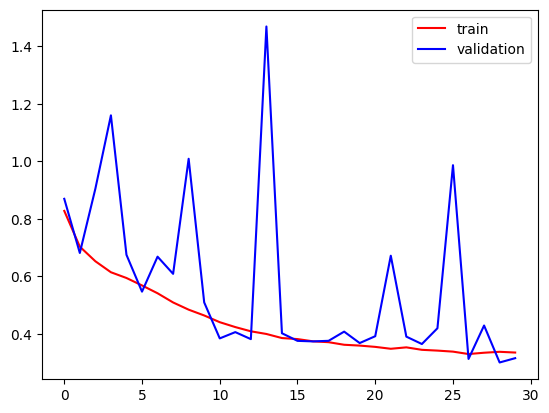

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Conclusion == Despite spikes, validation loss recovers and keeps decreasing → learning is valid.

##Now Training on new data


In [35]:
import cv2

In [52]:
test_img = cv2.imread('/content/dataset/test/dogs/dog.100.jpg')

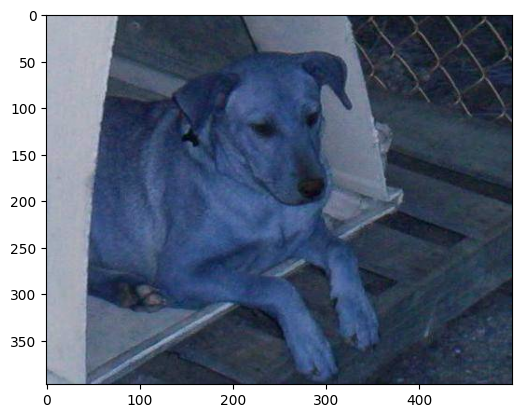

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(397, 500, 3)

In [55]:
test_img = cv2.resize(test_img, (256, 256))

In [56]:
test_input = test_img.reshape((1, 256, 256, 3))

In [57]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([[1.]], dtype=float32)

here 1 means dog and 0 means cat as by the sequence in which they are present,the model works fine

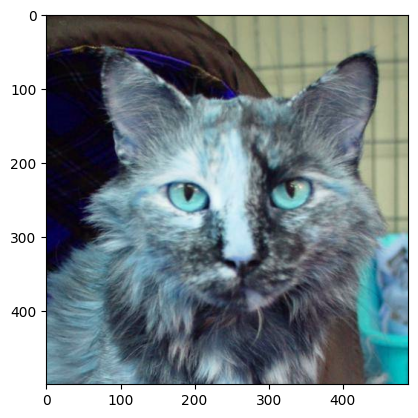

In [59]:
test_img_2 = cv2.imread('/content/dataset/test/cats/cat.10.jpg')
plt.imshow(test_img_2)

In [60]:
test_img_2.shape


(499, 489, 3)

In [61]:
test_img_2 = cv2.resize(test_img, (256, 256))

In [62]:
test_input_2 = test_img.reshape((1, 256, 256, 3))

In [63]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


array([[1.]], dtype=float32)

AS PER THE LAST EPOX:



Train accuracy     ≈ 0.894
Train loss         ≈ 0.330
Validation accuracy≈ 0.899
Validation loss    ≈ 0.316


# New Section